# Dask

This example is from the [dask tutorial](https://github.com/dask/dask-tutorial).

https://jakevdp.github.io/blog/2015/08/14/out-of-core-dataframes-in-python/

In [4]:
import dask.array as da

import numpy as np

a = np.random.randn(800)
# create a dask array from the above array
a2 = da.from_array(a, chunks=200)

# multiply this array by a factor
b2 = a2 * 4

# find the minimum value
b2_min = b2.min()
print(b2_min)

dask.array<amin-ag..., shape=(), dtype=float64, chunksize=()>


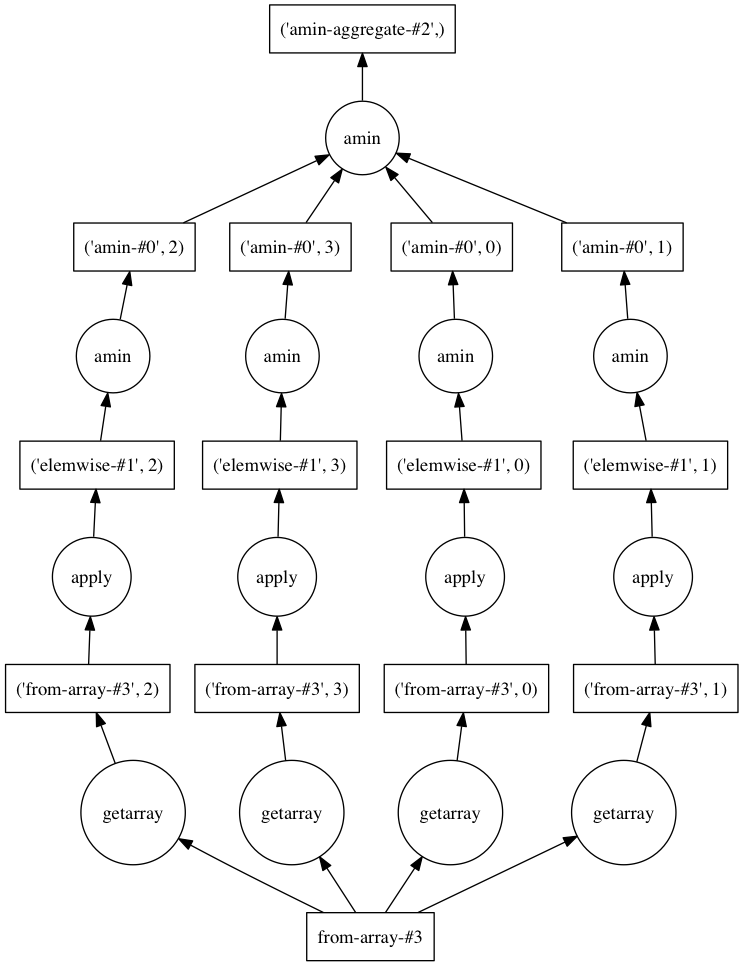

In [5]:
from dask.dot import dot_graph
dot_graph(b2_min.dask)

In [6]:
import os
import glob
import h5py
from matplotlib import pyplot as plt
%matplotlib inline

from prep import create_weather
create_weather()

In [7]:
filenames = sorted(glob.glob(os.path.join('data', 'weather-big', '*.hdf5')))
len(filenames)

31

In [8]:
!du -m data/weather-big

2130	data/weather-big


In [9]:
dsets = [h5py.File(filename)['/t2m'] for filename in filenames]
len(dsets)

31

In [10]:
dsets[0].shape

(5760, 11520)

In [11]:
#fig = plt.figure(figsize=(16, 8))
#plt.imshow(dsets[0], cmap='RdBu_r')

## Dask

In [12]:
import dask.array as da
arrays = [da.from_array(dset, chunks=(500, 500)) for dset in dsets]

In [13]:
x = da.stack(arrays, axis=0)
x.shape

(31, 5760, 11520)

In [14]:
res = x.std(axis=0)
res.shape

(5760, 11520)

KeyboardInterrupt: 

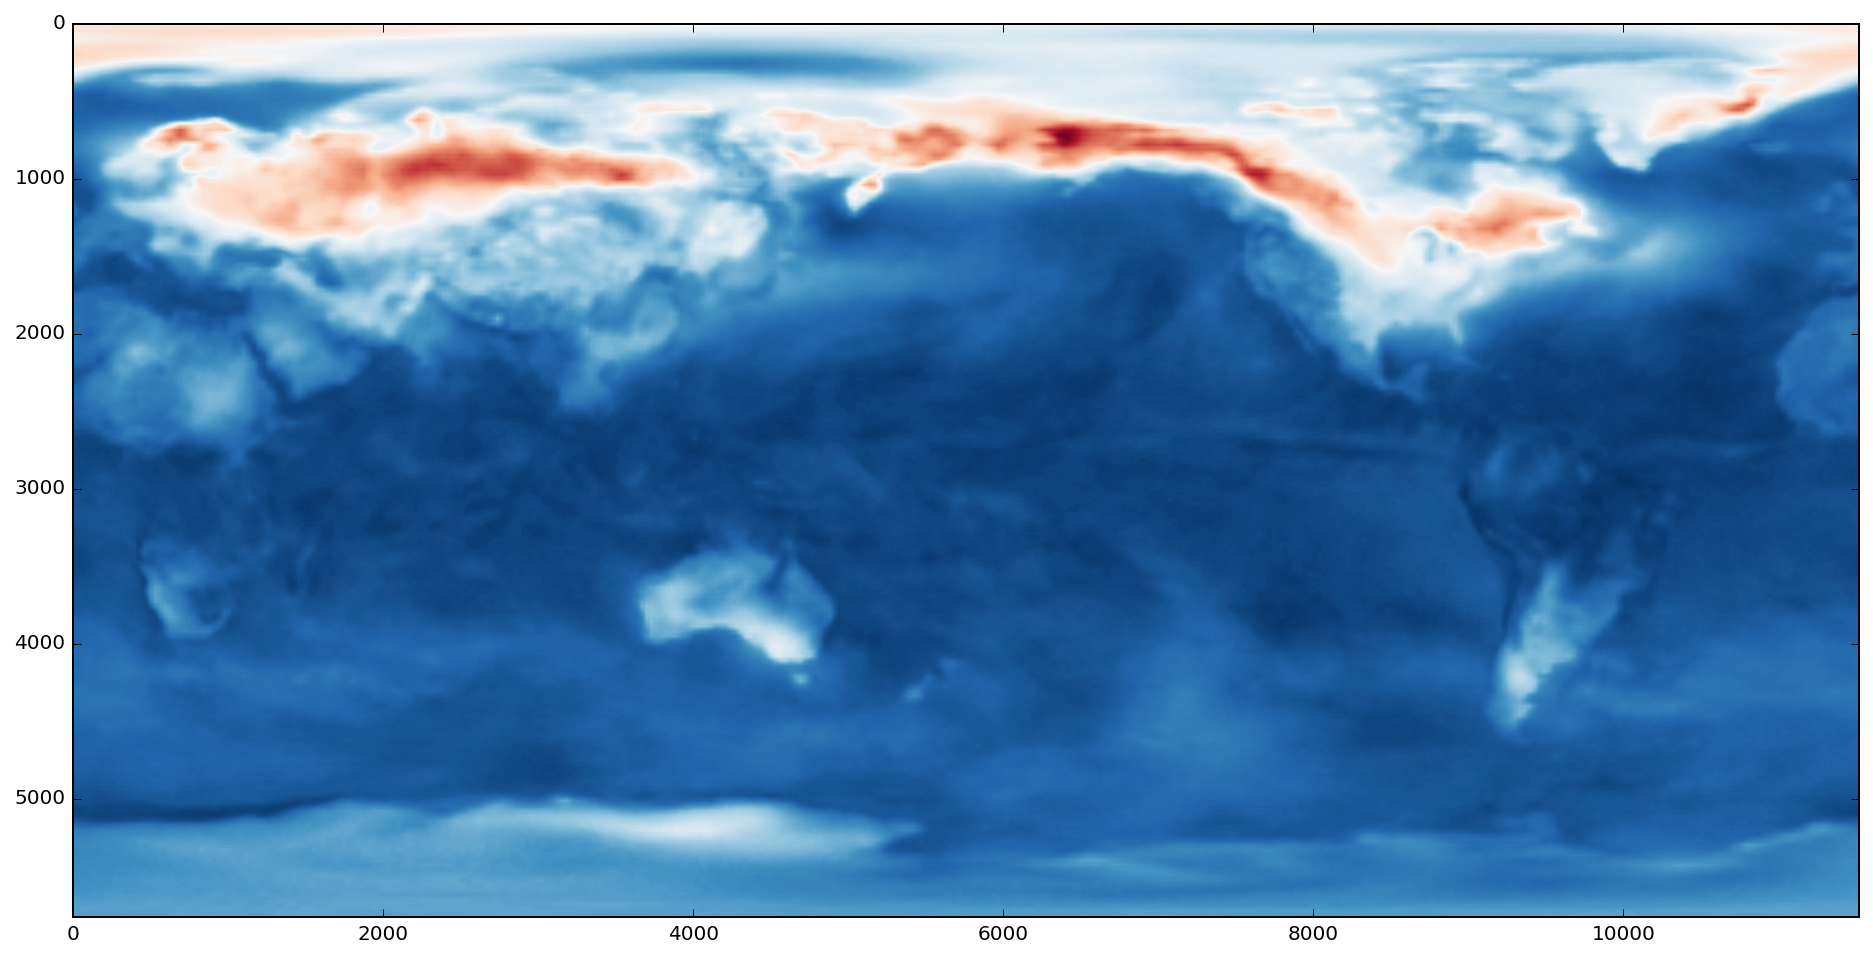

In [30]:
fig = plt.figure(figsize=(16, 8))
plt.imshow(res, cmap='RdBu_r')